In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('2.jpg')

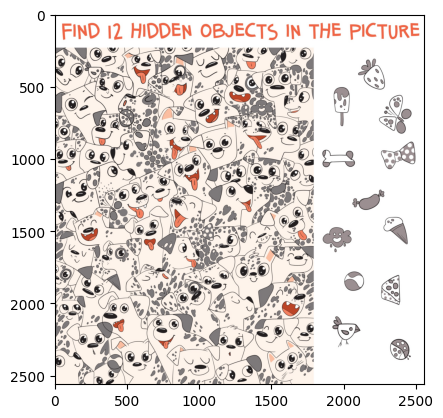

In [3]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

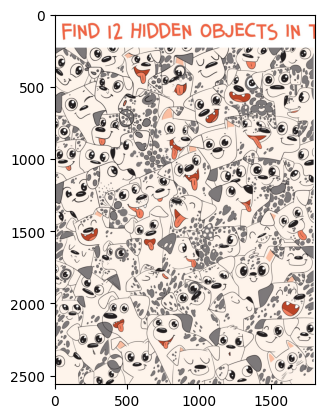

In [4]:
target = image[0:image.shape[0], 0:1800]
objects = []
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))

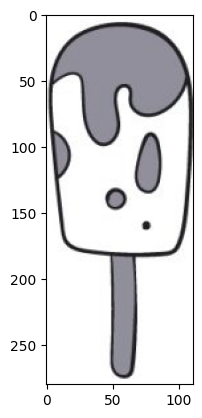

In [5]:
ice_cream = image[500:780, 1927:2038]
plt.imshow(ice_cream, cmap='gray')
objects.append(ice_cream)

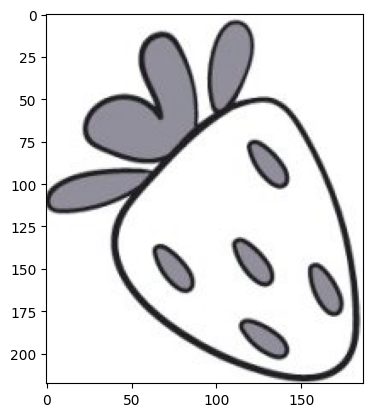

In [6]:
strawberry = image[305:523, 2098:2285]
plt.imshow(strawberry, cmap='gray')
objects.append(strawberry)

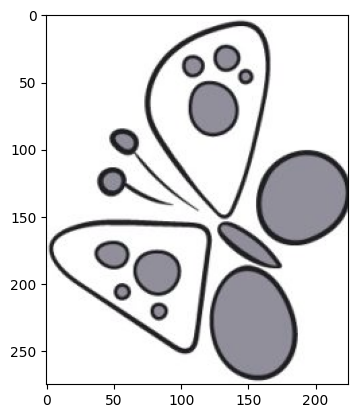

In [7]:
butterfly = image[555:830, 2240:2465]
plt.imshow(butterfly, cmap='gray')
objects.append(butterfly)

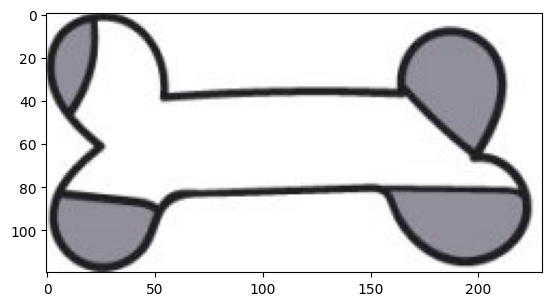

In [8]:
bone = image[940:1060, 1850:2080]
plt.imshow(bone, cmap='gray')
objects.append(bone)

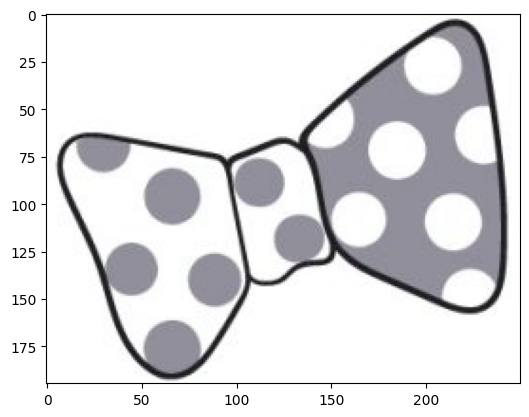

In [9]:
tie = image[880:1075, 2250:2500]
plt.imshow(tie, cmap='gray')
objects.append(tie)

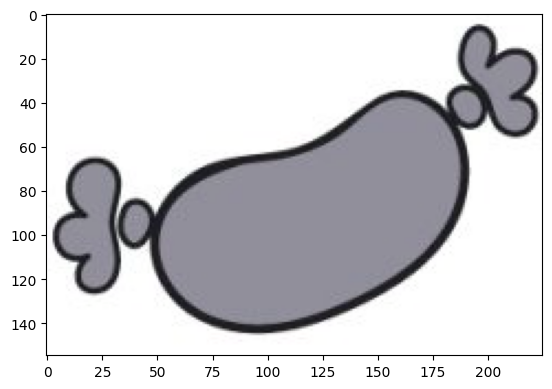

In [10]:
sausage = image[1210:1365, 2055:2280]
plt.imshow(sausage, cmap='gray')
objects.append(sausage)

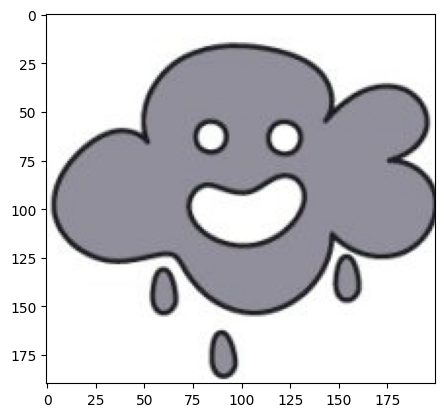

In [11]:
cloud = image[1460:1650, 1850:2050]
plt.imshow(cloud, cmap='gray')
objects.append(cloud)

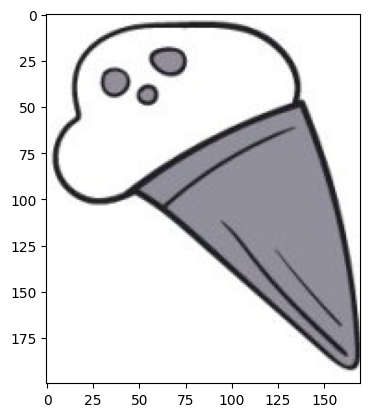

In [12]:
ice_cream = image[1400:1600, 2270:2440]
plt.imshow(ice_cream, cmap='gray')
objects.append(ice_cream)

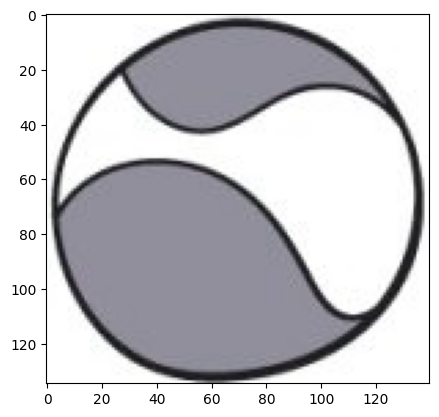

In [13]:
ball = image[1780:1915, 2000:2140]
plt.imshow(ball, cmap='gray')
objects.append(ball)

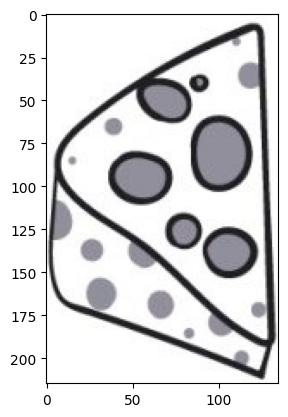

In [14]:
cheese = image[1800:2015, 2255:2390]
plt.imshow(cheese, cmap='gray')
objects.append(cheese)

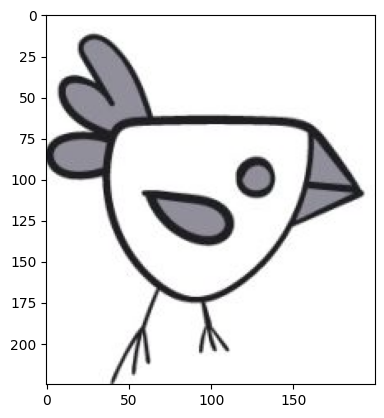

In [15]:
bird = image[2080:2305, 1920:2120]
plt.imshow(bird, cmap='gray')
objects.append(bird)

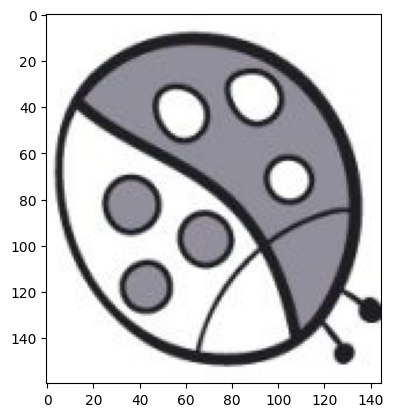

In [16]:
bug = image[2240:2400, 2315:2460]
plt.imshow(bug, cmap='gray')
objects.append(bug)

In [17]:
# Edge detection
def edge_detection(image):
    # Apply Gaussian blur
    blur = cv2.GaussianBlur(image, (5,5), 0)
    # Apply Canny edge detection
    edges = cv2.Canny(blur, 0, 50)
    return edges

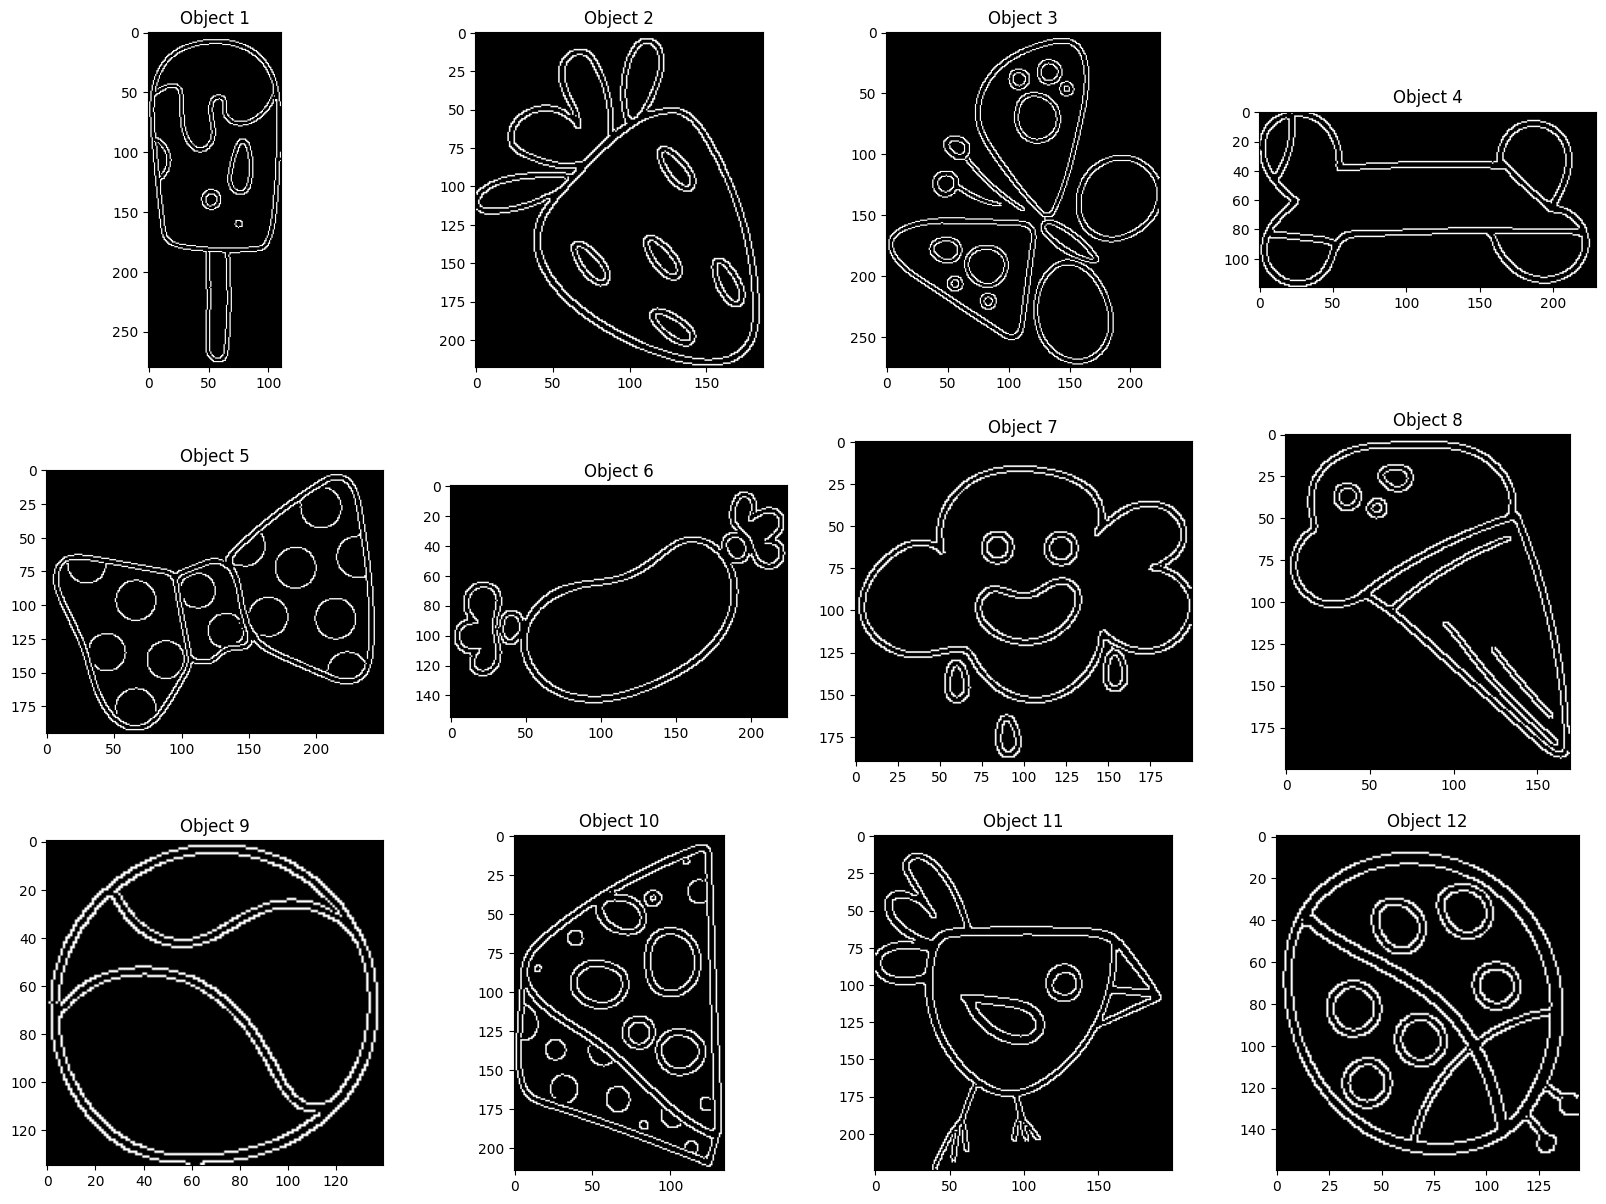

In [18]:
# Apply edge detection to object images
edges = []
for obj in objects:
    edges.append(edge_detection(obj))

# Show the objects edge detection results by subplot
plt.figure(figsize=(20, 20))
for i in range(len(objects)):
    plt.subplot(4, 4, i+1)
    plt.imshow(edges[i], cmap='gray')
    plt.title('Object ' + str(i+1))
plt.show()


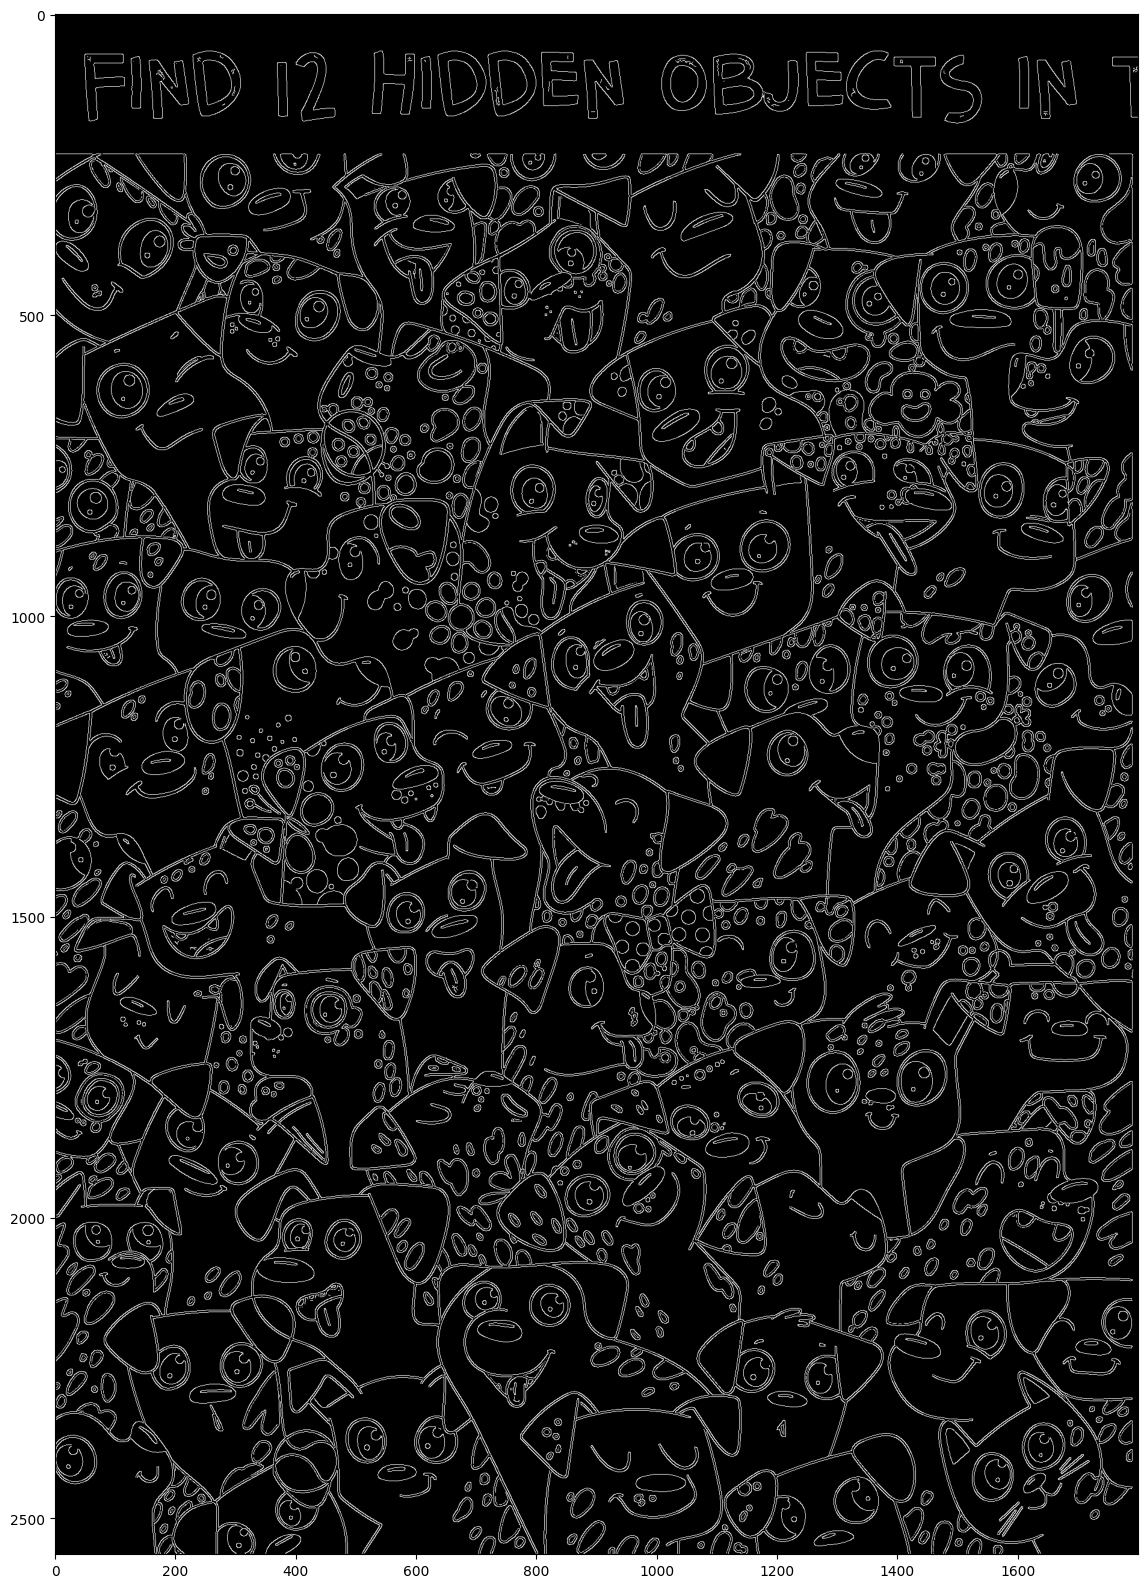

In [19]:
# Apply edge detection to the target image
target_edges = edge_detection(target)
# Show the target edge detection result with a bigger size
plt.figure(figsize=(20, 20))
plt.imshow(target_edges, cmap='gray', )

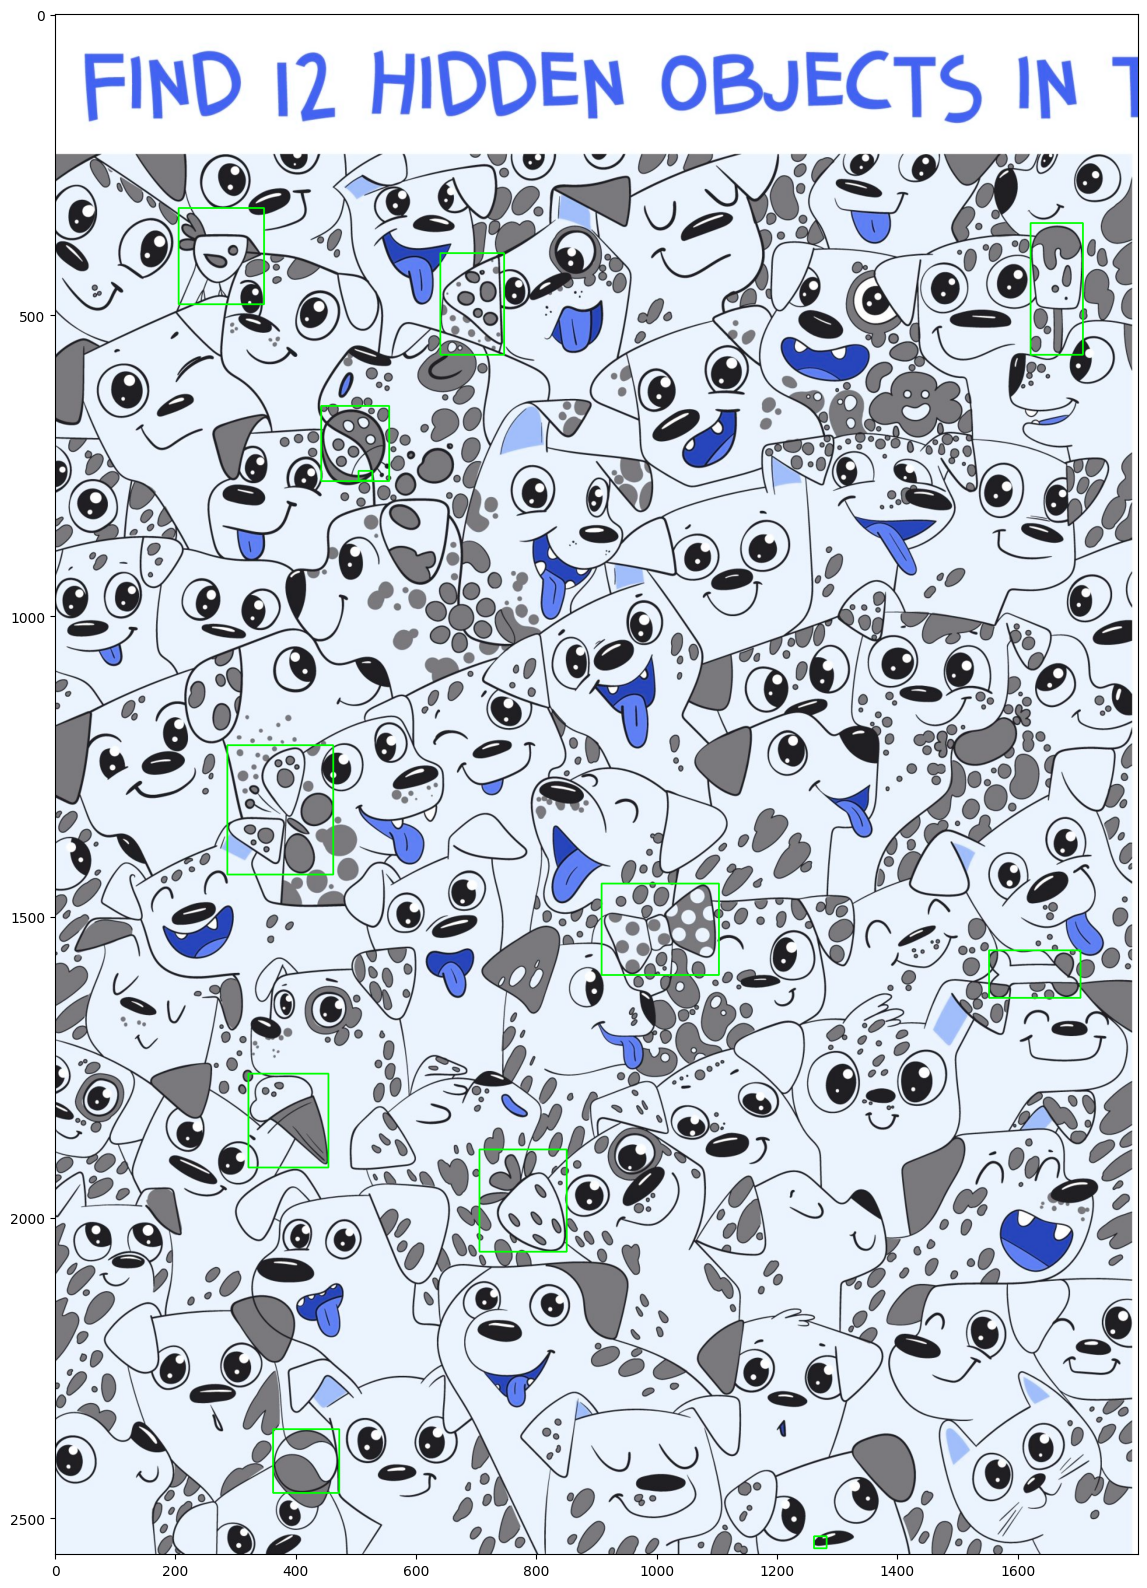

In [20]:
# Use template matching to find the object in the target image with edged images
def template_matching(target, template):
    # Initialize variables
    max_val = 0
    best_loc = None
    best_scale = None
    threshold = 0.4

    # Loop over different scales of the template
    for scale in np.linspace(0.1, 1.5, 400):
        # Resize the template
        resized_template = cv2.resize(template, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

        # Apply template matching
        res = cv2.matchTemplate(target, resized_template, cv2.TM_CCOEFF_NORMED)

        # Get the best match position and its score
        min_val, max_val_curr, min_loc, max_loc = cv2.minMaxLoc(res)

        # If the match is above the threshold and better than previous matches
        if max_val_curr >= threshold and max_val_curr > max_val:
            max_val = max_val_curr
            best_loc = max_loc
            best_scale = scale

    if best_loc is not None:
        return best_loc, best_scale
    else:
        print("Object not found.")
        return None, None

# Find the objects in the target image
locations = []
scales = []
for obj in objects:
    loc, scale = template_matching(target, obj)
    locations.append(loc)
    scales.append(scale)

# Show the objects in the target image

target_copy = target.copy()
for i, loc in enumerate(locations):
    if loc is not None:
        # Calculate the size of the scaled template
        template_shape = (int(objects[i].shape[1] * scales[i]), int(objects[i].shape[0] * scales[i]))
        # Draw rectangle on the target image
        cv2.rectangle(target_copy, loc, (loc[0] + template_shape[0], loc[1] + template_shape[1]), (0, 255, 0), 2)

# Show the target image with the objects
plt.figure(figsize=(20, 20))
plt.imshow(target_copy, cmap='gray')
plt.show()
